In [2]:
import pandas as pd
import numpy as np
import pickle
import array
import re
import numpy.ma as ma
from os import listdir
from os.path import isfile, join
import seaborn as sns
import matplotlib.pyplot as plt

# GS result reformating

In [8]:
def str_to_dict(x):
    a = x.replace("'", "\"")
    a = a.replace('masked_array','ma.masked_array')
    a = a.replace(' array','np.array')
    a = a.replace('\n      ','')
    a = a.replace(', dtype=int32','')
    a = re.sub(' +', ' ', a)
    a = eval(a)
    return a

In [9]:
data_gs = pd.read_csv('../Models/GS.csv')
for i,item in data_gs.iterrows():
    model_name = item.outcome+'_'+item.model
    cv_result = str_to_dict(item.GS_result)
    pickle.dump(cv_result, open('../Models/gs/' + model_name + '.sav', 'wb'))
    print(model_name)
        

3Months_LR
3Months_Lasso
3Months_NB
3Months_DT
3Months_RF
3Months_XGB
6Months_LR
6Months_Lasso
6Months_NB
6Months_DT
6Months_RF
6Months_XGB
12Months_LR
12Months_Lasso
12Months_NB
12Months_DT
12Months_RF
12Months_XGB
24Months_LR
24Months_Lasso
24Months_NB
24Months_DT
24Months_RF
24Months_XGB


In [11]:
model = pickle.load(open('../Models/gs/' + model_name + '.sav', 'rb'))

In [34]:
model['mean_test_average_precision'][model['rank_test_average_precision'][1]]

0.16068714

In [39]:
np.argmin(model['rank_test_average_precision'])

11

In [40]:
model['mean_test_average_precision'][np.argmin(model['rank_test_average_precision'])]

0.1961109

# GS result visualisation

In [42]:
files = [f for f in listdir('../Models/gs/') if isfile(join('../Models/gs/', f))]

In [43]:
files

['12months_DT.sav',
 '12months_ElasticNet.sav',
 '12months_Lasso.sav',
 '12months_LR.sav',
 '12months_NB.sav',
 '12months_RF.sav',
 '12months_XGB.sav',
 '24months_DT.sav',
 '24months_ElasticNet.sav',
 '24months_Lasso.sav',
 '24months_LR.sav',
 '24months_NB.sav',
 '24months_RF.sav',
 '24months_XGB.sav',
 '3months_DT.sav',
 '3months_ElasticNet.sav',
 '3months_Lasso.sav',
 '3months_LR.sav',
 '3months_NB.sav',
 '3months_RF.sav',
 '3months_XGB.sav',
 '6months_DT.sav',
 '6months_ElasticNet.sav',
 '6months_Lasso.sav',
 '6months_LR.sav',
 '6months_NB.sav',
 '6months_RF.sav',
 '6months_XGB.sav']

In [49]:
result = []
for file in files:
    model = pickle.load(open('../Models/gs/'+file, 'rb'))
    best_score_auprc =  model['mean_test_average_precision'][np.argmin(model['rank_test_average_precision'])]
    best_params_auprc = model['params'][np.argmin(model['rank_test_average_precision'])]
    best_score_ba =  model['mean_test_balanced_accuracy'][np.argmin(model['rank_test_balanced_accuracy'])]
    best_params_ba = model['params'][np.argmin(model['rank_test_balanced_accuracy'])]
    best_score_auc =  model['mean_test_roc_auc'][np.argmin(model['rank_test_roc_auc'])]
    best_params_auc = model['params'][np.argmin(model['rank_test_roc_auc'])]
    result.append([file.replace('.sav',''), best_score_auprc, best_params_auprc, best_score_ba, best_params_ba, best_score_auc, best_params_auc])

In [50]:
result = pd.DataFrame(result, columns=['model', 'best_score_auprc', 'best_params_auprc', 'best_score_ba', 'best_params_ba','best_score_auc', 'best_params_auc'])
result['outcome'] = result.apply(lambda x: x.model.split('_')[0], axis=1)
result['model'] = result.apply(lambda x: x.model.split('_')[1], axis=1)
result.to_csv('../Models/GS_result.csv', index_label=False, index=False)

# BS Result

In [3]:
result = pd.read_csv('../Models/BS_result.csv')

/tmp/ipykernel_195/1659550614.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar = sns.catplot(x = "outcome",       # x variable name


Text(0.5, 28.999999999999986, 'Method')

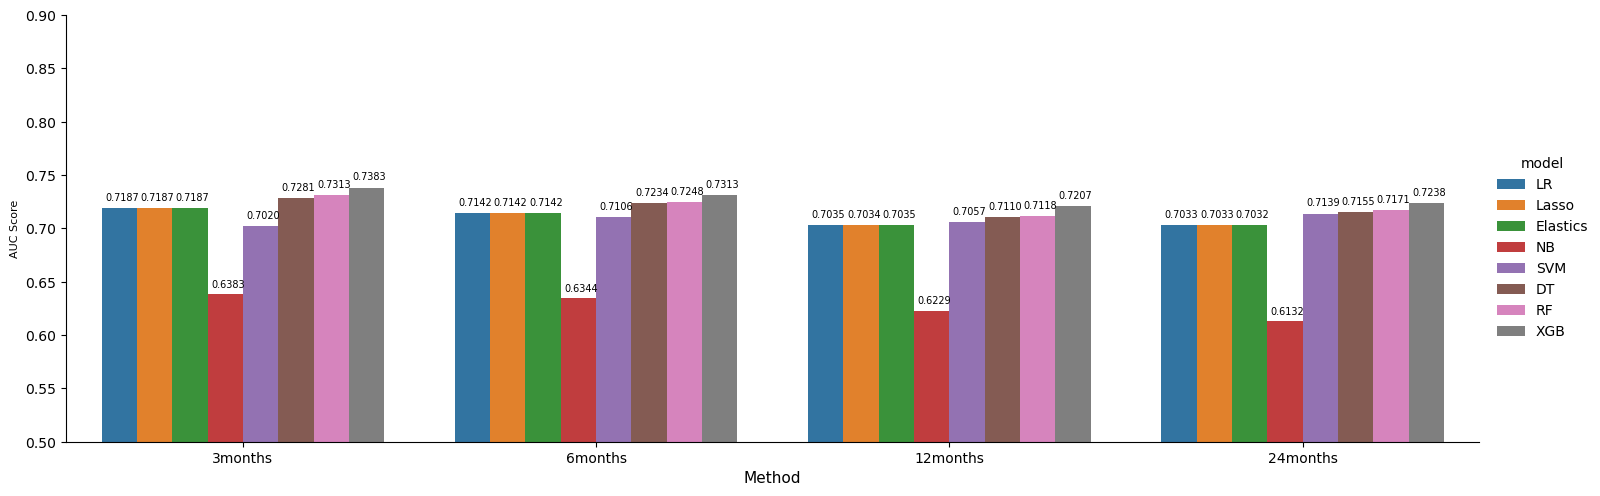

In [4]:
bar = sns.catplot(x = "outcome",       # x variable name
            y = "best_score",       # y variable name            
            data = result,     # dataframe to plot
            hue = 'model',
            kind = "bar",
            height=5,
            aspect=6/2,
            ci = None)
ax = bar.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.01, 
            p.get_height() * 1.01, 
            '{0:.4f}'.format(p.get_height()), 
            color='black', rotation='horizontal', fontsize=7)
    
# listOf_Yticks = np.arange(0.5, 0.7, 0.05)
ax.set_ylim(0.5, .9)
ax.set_ylabel('AUC Score', fontsize=8)
ax.set_xlabel('Method', fontsize=11)

In [9]:
result = result[result.model!='SVM']

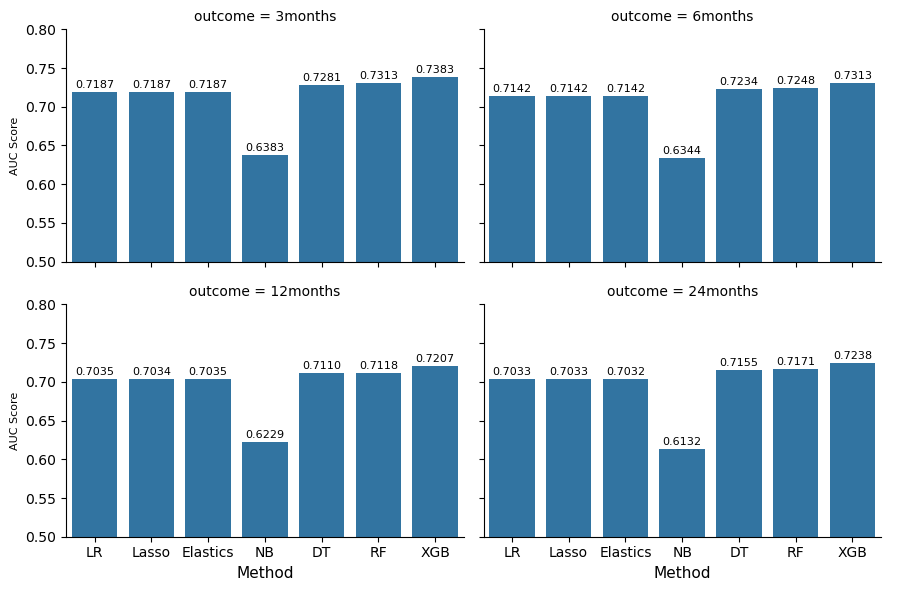

In [10]:
g = sns.FacetGrid(result, col='outcome', col_wrap=2, height=3, aspect=1.5, ylim=(0.5, 0.8))
g.map(sns.barplot, 'model', 'best_score', order=result.model.unique()).add_legend()

for ax in g.axes:
    for p in ax.patches:
             ax.annotate("%.4f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                 textcoords='offset points')
    ax.set_ylabel('AUC Score', fontsize=8)
    ax.set_xlabel('Method', fontsize=11)

In [9]:
result

,outcome,model,best_score,best_param
0,3months,lr,0.718657,"['liblinear', 0.3110204078235362, 161]"
1,3months,lasso,0.718719,"['saga', 5.264286812182277, 73]"
2,3months,elastic,0.718708,"[0.12538683368444242, 328]"
3,3months,gnb,0.638296,[2.771271564091625e-06]
4,3months,dt,0.728108,"['entropy', 'best', 6]"
5,3months,rf,0.731327,"['gini', 281, 7]"
6,3months,xgb,0.738290,"[251, 5, 0.017952118813409648, 0.0038566417152..."
7,3months,svm,0.702010,"[6.860182732616174, 20.610083751390142]"
8,6months,lr,0.714167,"['liblinear', 4.029759596937809, 65]"
9,6months,lasso,0.714181,"['saga', 5.264286812182277, 73]"
